In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) # x0^2 + x1^2

In [3]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [4]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X) #한지점에서의 gradient를 구하는 함수
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [5]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return x, vx
    else:
        return x

return_history = False 중간값 뽑을 건지 구분하는 매개변수

In [6]:
init_x = np.array([-3.0, 4.0])

초기값. -3, 4에서 출발함

In [7]:
learning_rate = 0.1

In [8]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

In [9]:
x_final

array([-6.11110793e-10,  8.14814391e-10])

Text(0.5, 1.0, 'Learning rate = 0.1')

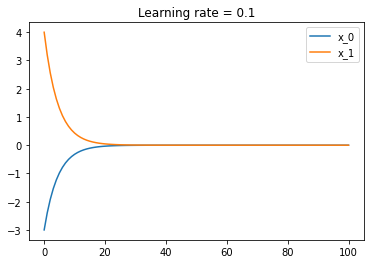

In [10]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

In [11]:
init_x

array([-3.,  4.])

### <생각> 100번까지 반복할 필요가 있을까?  
30번 째에서 init_x가 0에 수렴하는 것을 볼 수 있다. -> 30번 정도만 반복해도 괜찮을 것.  


## **궤적 그리기**

In [33]:
def gradient3D(init_x):
    x0 = np.arange(-4, 4, 0.5 ) #-2부터 2까지 0.25의 간격으로 -16개
    x1 = np.arange(-4, 4, 0.5)
    X, Y = np.meshgrid(x0, x1)
    nrows = X.shape[0]
    ncols = X.shape[1]
    
    Xf = X.flatten()
    Yf = Y.flatten()
    arr = np.array([Xf, Yf])
    arr = arr.transpose()#axis = 1로했을 때 이것을 추가해야함
    
    Z = function_2(arr)
    Z = np.reshape(Z, (nrows,ncols))
    
    z_hist=function_2(init_x)
    z_hist.shape
    
    #graph
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    ax.plot_wireframe(X, Y, Z)
    ax.plot(x_hist[:,0],x_hist[:,1],z_hist,'o-',c='orange')

    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('z')
    plt.show()

### Learning rate가 0.001일 때 

In [34]:
learning_rate = 0.001

In [35]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

Text(0.5, 1.0, 'Learning rate = 0.001')

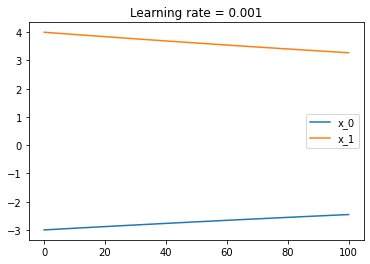

In [36]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

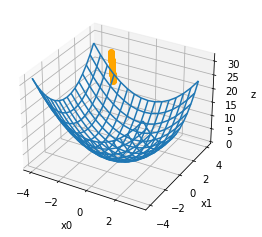

In [37]:
gradient3D(x_hist)

### Learning rate가 0.01일 때

In [38]:
learning_rate = 0.01

In [39]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

Text(0.5, 1.0, 'Learning rate = 0.01')

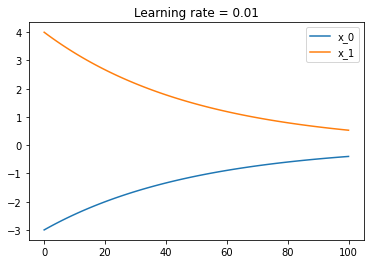

In [40]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

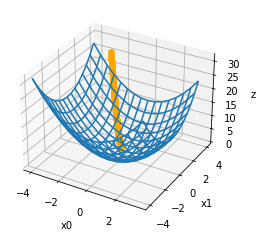

In [41]:
gradient3D(x_hist)

### Learning rate가 0.1일 때

In [42]:
learning_rate = 0.1

In [43]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

Text(0.5, 1.0, 'Learning rate = 0.1')

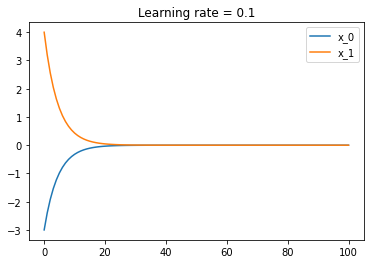

In [44]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

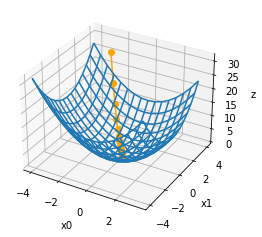

In [45]:
gradient3D(x_hist)

### Learning rate가 1.0일 때

In [46]:
learning_rate =  1.0

In [47]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

Text(0.5, 1.0, 'Learning rate = 1.0')

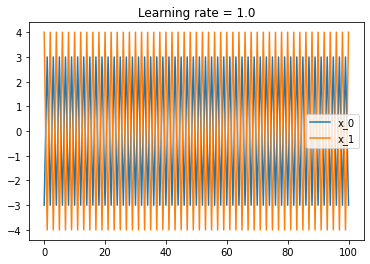

In [48]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

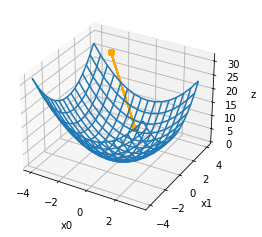

In [49]:
gradient3D(x_hist)

### Learning rate가 10.0일 때

In [50]:
learning_rate =  10.0

In [51]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

Text(0.5, 1.0, 'Learning rate = 10.0')

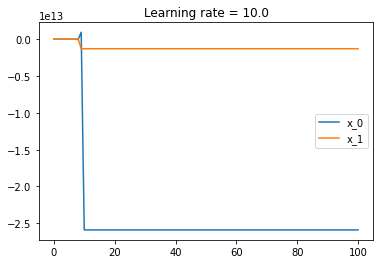

In [52]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

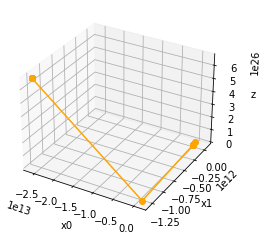

In [53]:
gradient3D(x_hist)